Actually performing the calculations is trivial, I just have to get the data. This notebook _should_ help me do just that. My sources are moneycontrol and Yahoo! Finance. Now Yahoo! Finance is sad because it readily gives the price data in csv format. I do not _want_ to scrape, but looks like I have no other choice. 


## Part 1

Extracting Balance Sheet from Moneycontrol and OHLC (open, high, low, close data) from Yahoo! Finance. Now moneycontrol is pesky, it does not allow me to save data in csv format,
and because I am a lifelong linux enthusiast, I will rather die before using MS Excel. So Let me spin up a selenium
instance. Or maybe try beautifulsoup. 


Life Update: I had to use selenium and bit of arm twisting to scrape data from Yahoo! Finance because morons use a javascript routine to fetch data instead of using static pages. It is sad, I know.

In [106]:
#all imports in one place 

from bs4 import BeautifulSoup
import requests
import csv
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
#at this point, I am basically copy pasting from the instagram scraper I once
#wrote, so a lot of these imports might turn out to be useless.
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import matplotlib.pyplot as plt

In [54]:
'''

READ ONLY: You cannot really make my life more difficult Rahul, but it would be 
better if you do not execute this cell. 
'''

file = open("profit_and_loss_BOB.csv", "w", newline='\n')
urls = ['/1', '/2', '/3']
data = dict()
write = csv.writer(file)
# headers = ['Interest / Discount on Advances / Bills', 'Income from Investments', 'Interest on Balance with RBI and Other Inter-Bank funds'] #trial, will extract these as well inshallah
for i in urls:
    r = requests.get('https://www.moneycontrol.com/financials/bankofbaroda/profit-lossVI/BOB{}#BOB'.format(i))
    soup = BeautifulSoup(r.text)
    z = soup.find_all('tr') #bingo we have the data. Now we just have to sanitize it.
    for i in z:
        if (i.text):
            tds = i.find_all('td')
            tds = [x.text for x in tds][:-1]
            header = tds[0]
            if header != '\xa0' and '' not in tds:
#                 print(tds)
#                 write.writerow(tds)
                if(header in data):
                    data[header] += tds[1:]
                else:
                    data[header] = tds[1:]
for i in data:
    j = [i] + data[i]
    write.writerow([i] + data[i])

Bingo! That was easy. Now I don't really have to save the dictionary and then go through the excruciating process of parsing JSONs everytime. Also, I guess I have enough data to do **fundamental** analysis now lol. 


Life update: I ended up saving the data in a csv file because I wanted to look at the beautiful excel sheet I created.

In [59]:
r = requests.get('https://finance.yahoo.com/quote/BANKBARODA.NS/history')
print(r.text)

<!DOCTYPE html>
  <html lang="en-us"><head>
  <meta http-equiv="content-type" content="text/html; charset=UTF-8">
      <meta charset="utf-8">
      <title>Yahoo</title>
      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">
      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
      <style>
  html {
      height: 100%;
  }
  body {
      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;
      background-size: cover;
      height: 100%;
      text-align: center;
      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;
  }
  table {
      height: 100%;
      width: 100%;
      table-layout: fixed;
      border-collapse: collapse;
      border-spacing: 0;
      border: none;
  }
  h1 {
      font-size: 42px;
      font-weight: 400;
      color: #400090;
  }
  p {
      color: #1A1A1A;
  }
  #message-1 {
      font-weight: bold;
      margin: 0;
  }
  #message-2 {
      display: 

Okay, so Yahoo finance does not allow scraping, that's just sad. But nothing has ever deterred the greatest of the great, Rahul Jha. They don't call me Stalker Supreme for nothing. Time to call the cavalry.

In [129]:
options = webdriver.ChromeOptions()
s = Service('/home/juggernautjha/Rahul/vision/Selenium/chromedriver')
driver = webdriver.Chrome(service = s, options = options)
driver.get('https://finance.yahoo.com/quote/BANKBARODA.NS/history?period1=1594857600&period2=1657929600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true')
# last_height = driver.execute_script("return document.body.scrollHeight")
# while True:
#     # Scroll down to the bottom.
#     driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

#     # Wait to load the page.
#     time.sleep(2)
#     print("scrolling\n")
#     # Calculate new scroll height and compare with last scroll height.
#     new_height = driver.execute_script("return document.body.scrollHeight")

#     if new_height == last_height:

#         break

#     last_height = new_height
import time
time.sleep(15)
import csv
file = open("price-history_.csv", "w")
write = csv.writer(file)
write.writerow(['Date', 'Open', 'High', 'Low', 'Close', 'Adj. Close', 'Volume'])
z = driver.find_elements(By.CSS_SELECTOR, "tr")
for i in z[-1::-1]:
    f = i.text.split(" ")
    try:
        eval(f[2])
        f = [f[0] + " " + f[1] + " " + f[2]] + f[3:]
    except:
        pass
    print(f)
    print(len(f))
    write.writerow(f)
    print("written")
        
# print("Now exporting")
# with open("yahoo-finance-cached.html", 'w') as f:
#     f.write(driver.page_source)


['RBLBANK.NS\nRBL', 'Bank', 'Limited\n81.90', '-0.30', '-0.36%']
5
written
['INDUSINDBK.NS\nIndusInd', 'Bank', 'Limited\n815.05', '-5.85', '-0.71%']
5
written
['CANBK.NS\nCanara Bank\n206.10 -3.45', '-1.65%']
2
written
['FEDERALBNK.NS\nThe', 'Federal', 'Bank', 'Limited\n98.75', '+1.55', '+1.59%']
6
written
['PNB.NS\nPunjab', 'National', 'Bank\n30.30', '-0.10', '-0.33%']
5
written
['Symbol', 'Last', 'Price', 'Change', '%', 'Change']
6
written
['*Close', 'price', 'adjusted', 'for', 'splits.**Adjusted', 'close', 'price', 'adjusted', 'for', 'splits', 'and', 'dividend', 'and/or', 'capital', 'gain', 'distributions.']
16
written
['Jul 16, 2020', '48.00', '48.35', '46.90', '48.10', '46.69', '22,261,317']
7
written
['Jul 17, 2020', '48.25', '49.70', '48.05', '49.40', '47.96', '23,121,971']
7
written
['Jul 20, 2020', '49.45', '50.30', '48.40', '48.65', '47.23', '33,226,925']
7
written
['Jul 21, 2020', '49.45', '49.85', '48.70', '49.40', '47.96', '26,865,913']
7
written
['Jul 22, 2020', '49.50', 

['Nov 18, 2020', '47.15', '49.90', '47.00', '49.60', '48.15', '52,946,624']
7
written
['Nov 19, 2020', '49.35', '49.35', '47.65', '47.95', '46.55', '27,880,377']
7
written
['Nov 20, 2020', '47.95', '48.30', '47.20', '47.55', '46.16', '17,592,043']
7
written
['Nov 23, 2020', '47.85', '48.20', '46.70', '46.90', '45.53', '20,454,971']
7
written
['Nov 24, 2020', '47.20', '47.45', '46.00', '46.85', '45.48', '31,404,794']
7
written
['Nov 25, 2020', '47.55', '50.70', '47.30', '49.05', '47.62', '95,600,102']
7
written
['Nov 26, 2020', '49.10', '51.50', '48.25', '51.15', '49.65', '55,805,690']
7
written
['Nov 27, 2020', '51.15', '52.50', '50.60', '51.35', '49.85', '61,204,165']
7
written
['Dec 01, 2020', '51.55', '54.20', '51.15', '53.75', '52.18', '58,316,841']
7
written
['Dec 02, 2020', '53.95', '55.25', '53.05', '54.10', '52.52', '61,231,380']
7
written
['Dec 03, 2020', '54.65', '58.70', '54.35', '58.30', '56.60', '88,098,471']
7
written
['Dec 04, 2020', '58.90', '59.75', '56.60', '59.05', '

['Apr 13, 2021', '67.15', '69.30', '66.30', '68.90', '66.89', '49,363,120']
7
written
['Apr 15, 2021', '67.75', '69.40', '66.30', '68.30', '66.30', '51,164,588']
7
written
['Apr 16, 2021', '68.30', '69.50', '67.05', '67.35', '65.38', '36,225,190']
7
written
['Apr 19, 2021', '65.00', '65.00', '62.50', '63.80', '61.94', '49,914,615']
7
written
['Apr 20, 2021', '64.95', '65.80', '62.70', '63.25', '61.40', '36,714,142']
7
written
['Apr 22, 2021', '62.05', '64.20', '61.75', '63.05', '61.21', '45,762,152']
7
written
['Apr 23, 2021', '62.60', '64.95', '62.50', '62.95', '61.11', '45,619,019']
7
written
['Apr 26, 2021', '63.50', '64.45', '63.20', '63.55', '61.69', '34,891,753']
7
written
['Apr 27, 2021', '63.90', '65.55', '63.55', '65.30', '63.39', '45,483,876']
7
written
['Apr 28, 2021', '66.00', '68.15', '65.75', '67.75', '65.77', '47,954,929']
7
written
['Apr 29, 2021', '68.45', '69.75', '66.55', '66.85', '64.90', '50,981,272']
7
written
['Apr 30, 2021', '65.40', '68.40', '65.05', '66.75', '

['Sep 02, 2021', '78.70', '78.95', '77.80', '78.40', '76.11', '23,249,453']
7
written
['Sep 03, 2021', '78.55', '80.30', '78.25', '79.20', '76.88', '24,039,114']
7
written
['Sep 06, 2021', '79.60', '80.20', '78.70', '78.90', '76.59', '14,905,577']
7
written
['Sep 07, 2021', '79.00', '79.25', '76.70', '78.10', '75.82', '16,964,984']
7
written
['Sep 08, 2021', '78.00', '80.50', '77.65', '79.35', '77.03', '28,788,968']
7
written
['Sep 09, 2021', '79.30', '79.75', '78.75', '79.15', '76.84', '11,453,820']
7
written
['Sep 13, 2021', '78.75', '79.00', '78.00', '78.25', '75.96', '10,280,673']
7
written
['Sep 14, 2021', '78.70', '79.05', '78.10', '78.65', '76.35', '12,162,777']
7
written
['Sep 15, 2021', '78.65', '81.85', '78.45', '81.30', '78.92', '38,935,049']
7
written
['Sep 16, 2021', '81.25', '86.55', '80.40', '85.90', '83.39', '83,100,665']
7
written
['Sep 17, 2021', '86.55', '86.65', '81.25', '82.30', '79.89', '63,908,701']
7
written
['Sep 20, 2021', '81.40', '82.15', '78.00', '78.25', '

['Jan 20, 2022', '95.95', '97.50', '95.55', '96.70', '93.87', '37,096,905']
7
written
['Jan 21, 2022', '95.60', '95.70', '91.55', '92.70', '89.99', '39,203,300']
7
written
['Jan 24, 2022', '92.30', '93.60', '90.70', '92.60', '89.89', '56,181,631']
7
written
['Jan 25, 2022', '92.00', '99.70', '91.55', '98.50', '95.62', '65,620,823']
7
written
['Jan 27, 2022', '97.00', '104.00', '96.10', '103.50', '100.47', '94,518,500']
7
written
['Jan 28, 2022', '104.45', '106.50', '102.75', '103.30', '100.28', '56,977,661']
7
written
['Jan 31, 2022', '103.95', '108.40', '103.05', '107.55', '104.41', '61,044,762']
7
written
['Feb 01, 2022', '108.60', '109.30', '102.40', '106.15', '103.05', '86,624,214']
7
written
['Feb 02, 2022', '106.85', '110.20', '106.20', '109.40', '106.20', '47,769,665']
7
written
['Feb 03, 2022', '109.10', '111.90', '108.50', '109.55', '106.35', '54,520,992']
7
written
['Feb 04, 2022', '109.80', '111.35', '106.15', '106.55', '103.44', '45,581,685']
7
written
['Feb 07, 2022', '108

['Jun 07, 2022', '101.40', '103.25', '100.90', '101.90', '98.92', '17,522,351']
7
written
['Jun 08, 2022', '102.40', '105.35', '101.40', '103.55', '100.52', '31,448,826']
7
written
['Jun 09, 2022', '103.20', '105.35', '102.45', '105.05', '101.98', '25,588,925']
7
written
['Jun 10, 2022', '103.00', '105.45', '102.90', '105.10', '102.03', '15,753,322']
7
written
['Jun 13, 2022', '102.20', '102.95', '98.50', '99.95', '97.03', '22,147,285']
7
written
['Jun 14, 2022', '99.10', '102.15', '99.10', '100.55', '97.61', '18,606,407']
7
written
['Jun 15, 2022', '101.00', '102.10', '99.40', '100.10', '97.17', '15,884,977']
7
written
['Jun 16, 2022', '101.60', '102.15', '97.05', '97.50', '94.65', '24,322,328']
7
written
['Jun 17, 2022', '2.85', 'Dividend']
3
written
['Jun 17, 2022', '95.90', '96.90', '94.10', '95.05', '95.05', '21,919,900']
7
written
['Jun 20, 2022', '95.60', '96.00', '89.85', '91.15', '91.15', '21,703,028']
7
written
['Jun 21, 2022', '92.10', '97.35', '91.75', '96.05', '96.05', '28

And we are done. Now that I have the page source, i do not need to torture my RAM and use selenium for scraping. Beautifulsoup would do just fine. Also, for the love of god and everything that is holy **DO NOT RUN** the cell above on anything with less than a few gigabytes of RAM.

Now I have no idea what to do with EPS and PEG. I mean sure, I can calculate it but what next? I think the way to go is to scrape data for _every_ stock in NIFTY200 (not everything, just the PE ratio and the EPS) and then compare them. Hopefully my bank will come out on top. 
Calculating the technical indicators should be easy (I'll see lol), and I'll just graph it. I have no idea what to do with after that.

In [10]:
#defining stuff
DATE = 0
OPEN = 1
HIGH = 2
LOW = 3
CLOSE = 4

In [19]:
hist = pd.read_csv('price-history_.csv')
hist
# fig2 = make_subplots(specs=[[{"secondary_y": True}]])
# fig2.add_trace(go.Scatter(x=hist['Date'],y=hist['Close'],name='Price'),secondary_y=False)
# fig2.add_trace(go.Bar(x=hist['Date'],y=hist['Volume'],name='Volume'),secondary_y=True)
# fig2.show()



,Date,Open,High,Low,Close,Adj. Close,Volume
0,"Jul 16, 2020",48.00,48.35,46.90,48.10,46.69,22261317
1,"Jul 17, 2020",48.25,49.70,48.05,49.40,47.96,23121971
2,"Jul 20, 2020",49.45,50.30,48.40,48.65,47.23,33226925
3,"Jul 21, 2020",49.45,49.85,48.70,49.40,47.96,26865913
4,"Jul 22, 2020",49.50,49.95,48.35,48.70,47.28,27424578
...,...,...,...,...,...,...,...
488,"Jul 11, 2022",104.90,109.95,104.40,109.55,109.55,34213586
489,"Jul 12, 2022",108.80,110.50,108.10,109.25,109.25,29735635
490,"Jul 13, 2022",109.50,110.50,108.15,108.45,108.45,15508962
491,"Jul 14, 2022",108.00,108.00,103.70,105.20,105.20,33537636


Look at the beautiful graph. It is interactive. The only drawback is that is uses javascript for reasons known to no one. Not me. Now, to calculate technical indicators, I can either write functions that take a dataframe and then add a column, or something. Or I can go full consultant and use readymade tools. Let me do both. This will allow me to check if I am truly a top comder. 

In [4]:
#Now,n day averages aren't defined for n-1 days. Yup. Pandas for the win
def SMA(n):
    close = hist
    close['SMA'.format(n)] = close['Close'].rolling(n).mean()
    close.dropna(inplace = True)
    close.head()
    return close
c = SMA(10)

def graph(n):
    c = SMA(n)
    fig3 = make_subplots(specs=[[{"secondary_y": True}]])
    fig3.add_trace(go.Scatter(x=c['Date'],y=c['Close'],name='Price'),secondary_y=False)
    fig3.add_trace(go.Scatter(x=c['Date'],y=c['SMA'],name='Moving Average'),secondary_y=False)
#     fig3.add_trace(go.Bar(x=hist['Date'],y=hist['Volume'],name='Volume'),secondary_y=True)
    fig3.show()
    


N-day average works splendidly. Great Success. 

McGinley Dynamic, on the other hand, is a uniquely strange problem. I am unable to figure out what M_{t-1} should be for t = 1. I mean if I set M_1 = Close, let us see what we get.

In [7]:
rows = []
def populate_rows(): #loops on dataframes -> bad idea *retches*
    with open('price-history_.csv', 'r') as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
            z = [row[0]] + [eval(x) for x in row[1:]]
            rows.append(z)

populate_rows()


In [16]:
def mc_ginley(rows, N):
    mc_indices = [rows[0][CLOSE]]
    for i in rows[1:]:
        prev = mc_indices[-1]
        mc_index = prev + (i[CLOSE] - prev)/(0.6* N*((i[CLOSE]/prev)**4))
        mc_indices.append(mc_index)
    return mc_indices


def graph_mc_ginley(rows, N):
    hist = pd.read_csv("price-history_.csv")
    hist['mc'] = mc_ginley(rows, N)
    fig3 = make_subplots(specs=[[{"secondary_y": True}]])
    fig3.add_trace(go.Scatter(x=hist['Date'],y=hist['Close'],name='Price'),secondary_y=False)
    fig3.add_trace(go.Scatter(x=hist['Date'],y=hist['mc'],name='McGinley'),secondary_y=False)

    #     fig3.add_trace(go.Bar(x=hist['Date'],y=hist['Volume'],name='Volume'),secondary_y=True)
    fig3.show()

In [17]:
#Comparison between moving average and mc_ginley
for I in range(10, 100, 10):
    print(I)
    graph(I)
    graph_mc_ginley(rows, I/2)

10


20


30


40


50


60


70


80


90


So, the mc_ginley metric (idk lol) lags a lot less than simple moving average. 
Now. to implement PGO (or PGI, whatever floats your boat) I'll have to first implement EMA. Which should be easy.

In [36]:
def EMA(hist, n, col):
    c = hist
    c['ewm'] = c[col].ewm(span=n,min_periods=0,adjust=False,ignore_na=False).mean()
    return c
#works splendidly, cross checked from trading view.

In [50]:
def wwma(values, n):
    """
     J. Welles Wilder's EMA 
    """
    return values.ewm(alpha=1/n, adjust=False).mean()

In [58]:
def ATR(df, n=14):
    data = df.copy()
    high = data['High']
    low = data['Low']
    close = data['Close']
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)
    atr = wwma(tr, n)
    df['atr'] = atr
    return df


In [59]:
def PGO(n):
    c = SMA(n)
    #this gives us a dataframe with SMA. I do NOT want to code ever again.
    c = ATR(c, n)
    #this will give us a dataframe with average
    c = EMA(c, n, 'atr')
    c.dropna(inplace=True)
    c['PGO'] = (c['Close'] - c['SMA'])/c['ewm']
    return c
#works splendidly. Checked.

Technical Indicators implemented. I have little to no idea what to do with them. Sure, I can graph them but what next? If only I knew how to trade....

Now for the _fundamental_ indicators, EPS is of no use by itself. So I'll modify the data fetching function and just extract the profit and EPS rows for banks. Then compare. Then sleep.

In [63]:
BANKS_NIFTY_200 = {
    "AUBANK" : "https://www.moneycontrol.com/financials/ausmallfinancebank/profit-lossVI/ASF02/{}#ASF02",
    "AXISBANK" : "https://www.moneycontrol.com/financials/axisbank/profit-lossVI/AB16/{}#AB16",
    "BANDHANBANK" : "https://www.moneycontrol.com/financials/bandhanbank/profit-lossVI/BB09/{}#BB09",
    "BANKBARODA" : "https://www.moneycontrol.com/financials/bankofbaroda/profit-lossVI/BOB/{}#BOB",
    "BANKINDIA" : "https://www.moneycontrol.com/financials/bankofindia/profit-lossVI/BOI/{}#BOI",
    "CANBANK" : "https://www.moneycontrol.com/financials/canarabank/profit-lossVI/CB06/{}#CB06",
    "HDFCBANK" : "https://www.moneycontrol.com/financials/hdfcbank/profit-lossVI/HDF01/{}#HDF01",
    "ICICIBANK" : "https://www.moneycontrol.com/financials/icicibank/profit-lossVI/ICI02/{}#ICI02",
    "INDIANB" : "https://www.moneycontrol.com/financials/indianbank/profit-lossVI/IB04/{}#IB04",
    "INDUSINDBK" : "https://www.moneycontrol.com/financials/indusindbank/profit-lossVI/IIB/{}#IIB",
    "KOTAKBANK" : "https://www.moneycontrol.com/financials/kotakmahindrabank/profit-lossVI/KMB/{}#KMB",
    "PNB" : "https://www.moneycontrol.com/financials/punjabnationalbank/profit-lossVI/PNB05/{}#PNB05",
    "SBIN" : "https://www.moneycontrol.com/financials/statebankofindia/profit-lossVI/SBI/{}#SBI",
    "UNIONBANK" : "https://www.moneycontrol.com/financials/unionbankofindia/profit-lossVI/UBI01/{}#UBI01",
    "YESBANK" : "https://www.moneycontrol.com/financials/yesbank/profit-lossVI/YB/{}#YB"
}

#god did this take a lot of time lololol
#Also I missed IDFC and IDBI banks because they suck. Yes.


Now a simple scraper that would collate all data. We just need EPS and Profits over the years. Nothing More, and certainly nothing less.

In [85]:
def scrape(url):
    urls = ['/1', '/2', '/3']
    data = dict()
    r = requests.get(url)
    soup_ = BeautifulSoup(r.text)
    z = soup_.find_all("span", class_="span_price_wrap")
    print(z)
    try:
        data["price"] = eval(z[0].text)
    except:
        data["price"] = "NOT"
    for i in urls:
        r = requests.get(url.format(i))
        soup = BeautifulSoup(r.text)
        z = soup.find_all('tr') #bingo we have the data. Now we just have to sanitize it.
        for i in z:
            if (i.text):
                tds = i.find_all('td')
                tds = [x.text for x in tds][:-1]
                for l in range(len(tds)):
                    try:
                        
                        tds[l] = eval(tds[l].replace(",", ""))
                    except:
                        pass
                header = tds[0]
                if "Profit & Loss" in header:
                    if(header in data):
                            data[header] += tds[1:]
                    else:
                        data[header] = tds[1:]
                if header in ["Net Profit / Loss for The Year", "Basic EPS (Rs.)", "Diluted EPS (Rs.)"]:
                    if header != '\xa0' and '' not in tds:
        #                 print(tds)
        #                 write.writerow(tds)
                        if(header in data):
                            data[header] += tds[1:]
                        else:
                            data[header] = tds[1:]
    return data
all_banks = dict()
for i in BANKS_NIFTY_200:
    all_banks[i] =  scrape(BANKS_NIFTY_200[i])
    

[<span class="span_price_wrap stprh red_hilight rdclr">550.90</span>, <span class="span_price_wrap stprh red_hilight rdclr">550.15</span>]
[<span class="span_price_wrap stprh red_hilight rdclr">662.50</span>, <span class="span_price_wrap stprh red_hilight rdclr">662.20</span>]
[<span class="span_price_wrap stprh red_hilight rdclr">270.20</span>, <span class="span_price_wrap stprh red_hilight rdclr">270.30</span>]
[<span class="span_price_wrap stprh red_hilight rdclr">104.05</span>, <span class="span_price_wrap stprh red_hilight rdclr">104.05</span>]
[<span class="span_price_wrap stprh red_hilight rdclr">45.55</span>, <span class="span_price_wrap stprh red_hilight rdclr">45.60</span>]
[<span class="span_price_wrap stprh red_hilight rdclr">206.05</span>, <span class="span_price_wrap stprh red_hilight rdclr">206.10</span>]
[<span class="span_price_wrap stprh grn_hilight grnclr">1363.85</span>, <span class="span_price_wrap stprh grn_hilight grnclr">1362.05</span>]
[<span class="span_price_

In [86]:
for i in all_banks:
    print(i)
    for j in all_banks[i]:
        print(j, all_banks[i][j])
    print()

AUBANK
price 550.9
Profit & Loss account of AU Small Finance Bank (in Rs. Cr.) ['Mar 22', 'Mar 21', 'Mar 20', 'Mar 19', 'Mar 18', 'Mar 17', 'Mar 16', 'Mar 15', 'Mar 14', 'Mar 13']
Net Profit / Loss for The Year [1129.83, 1170.68, 674.78, 381.81, 292.04, 821.98, -799.78, -547.57, -492.97, -341.3]
Basic EPS (Rs.) [36.06, 38.19, 22.78, 13.16, 10.26, 30.18, 9.28, 5.31, 2.99, 3.4]
Diluted EPS (Rs.) [35.69, 37.86, 22.32, 12.9, 10.0, 29.61, 9.28, 5.31, 2.99, 2.86]

AXISBANK
price 662.5
Profit & Loss account of Axis Bank (in Rs. Cr.) ['Mar 22', 'Mar 21', 'Mar 20', 'Mar 19', 'Mar 18', 'Mar 17', 'Mar 16', 'Mar 15', 'Mar 14', 'Mar 13', 'Mar 12', 'Mar 11']
Net Profit / Loss for The Year [13025.48, 6588.5, 1627.22, 4676.61, 275.68, 3679.28, 8223.66, 7357.82, 6217.67, 5179.43, 4242.21, 3388.49]
Basic EPS (Rs.) [42.48, 22.15, 5.99, 18.2, 1.13, 15.4, 34.59, 31.0, 132.56, 119.67, 102.94, 82.95]
Diluted EPS (Rs.) [42.35, 22.09, 5.97, 18.09, 1.12, 15.34, 34.4, 31.0, 132.23, 118.85, 102.2, 81.61]

BANDHAN

{'AXISBANK': 0.16991735007035516, 'BANKBARODA': 0.01072700293298613, 'BANKINDIA': 0.15091729512317745, 'CANBANK': 0.06883337462183484, 'HDFCBANK': 1.1303220320611223, 'ICICIBANK': 0.5551987722393091, 'INDIANB': 0.24440467027702856, 'INDUSINDBK': 0.25468356152167704, 'KOTAKBANK': 1.8616697906765327, 'PNB': 0.18466947960618846, 'SBIN': 0.24458866339885477, 'UNIONBANK': 0.0672014339766492}


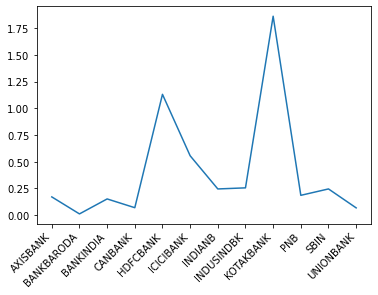

In [115]:
PE_ratio = {i : all_banks[i]['price']/all_banks[i]['Basic EPS (Rs.)'][0] for i in all_banks} #slick, innit?
EARNINGS_GROWTH = {i : (all_banks[i]['Basic EPS (Rs.)'][0] - all_banks[i]['Basic EPS (Rs.)'][1])/(all_banks[i]['Basic EPS (Rs.)'][1]) for i in all_banks}
EARNINGS_GROWTH = {i: EARNINGS_GROWTH[i]*100 for i in EARNINGS_GROWTH}
EPG = {i: PE_ratio[i]/EARNINGS_GROWTH[i] for i in PE_ratio}
PEG = {}
for i in EPG:
    if EPG[i] >= 0:
        PEG[i] = EPG[i] #because negative values are absurd
print(PEG)
plt.plot([i for i in PEG], [PEG[i] for i in PEG])
plt.xticks(rotation=45, ha='right')
plt.show()
#BOB the most undervalued. Like Myself.